<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №6

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [2]:
import io
import requests
import ssl
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/creditcard.csv"
dataset=pd.read_csv(url)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**1. Загрузить датасет**

**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [3]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
print('отсутствующих значений в таблице:', sum(dataset.isnull().sum()))

отсутствующих значений в таблице: 0


**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [8]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
import numpy as np
class_value = [0, 1]
class_counts = np.array(dataset['Class'].value_counts())

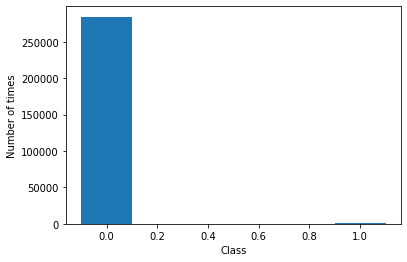

In [28]:
import matplotlib.pyplot as plt
plt.bar(class_value, class_counts, width=0.2)
plt.xlabel('Class')
plt.ylabel('Number of times')
plt.show()

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [11]:
class_amount = dataset[['Class', 'Amount']].groupby('Class').sum()
print(class_amount)

             Amount
Class              
0      2.510246e+07
1      6.012797e+04


In [12]:
Amount_0 = dataset[dataset['Class'] == 0]['Amount']
Amount_1 = dataset[dataset['Class'] == 1]['Amount']

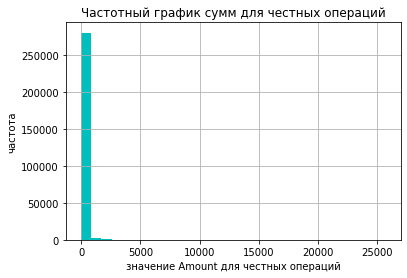

In [13]:
plt.hist(Amount_0, 30, facecolor='c')
plt.xlabel('значение Amount для честных операций')
plt.ylabel('частота')
plt.title('Частотный график сумм для честных операций')
plt.grid(True)
plt.show()

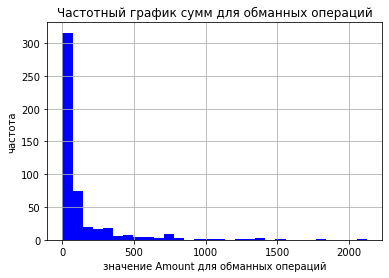

In [14]:
plt.hist(Amount_1, 30, facecolor='b')
plt.xlabel('значение Amount для обманных операций')
plt.ylabel('частота')
plt.title('Частотный график сумм для обманных операций')
plt.grid(True)
plt.show()

**5. Построить графики histograms для всех значений**

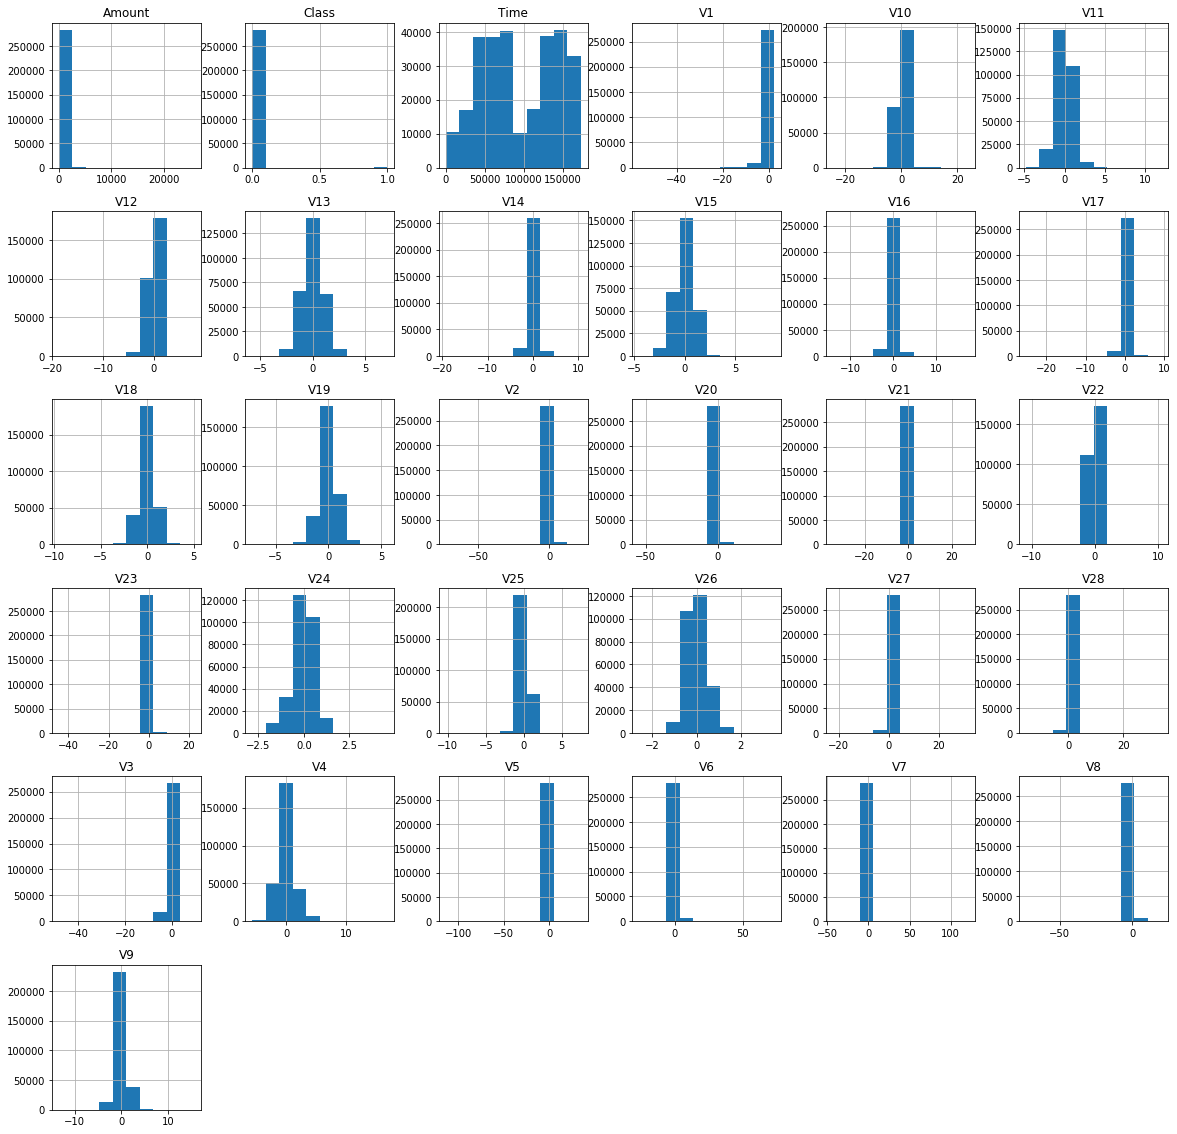

In [15]:
dataset.hist(figsize=(20,20))
plt.show()

**6. Построить матрицу корреляций для всех значений**

In [16]:
import numpy as np
corr_ = np.round_(dataset.corr(), decimals=2)
print(corr_)

        Time    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...   V21  \
Time    1.00  0.12 -0.01 -0.42 -0.11  0.17 -0.06  0.08 -0.04 -0.01  ...  0.04   
V1      0.12  1.00  0.00 -0.00  0.00  0.00  0.00  0.00 -0.00  0.00  ... -0.00   
V2     -0.01  0.00  1.00  0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00  ...  0.00   
V3     -0.42 -0.00  0.00  1.00 -0.00 -0.00  0.00  0.00  0.00 -0.00  ... -0.00   
V4     -0.11  0.00 -0.00 -0.00  1.00 -0.00 -0.00  0.00  0.00  0.00  ... -0.00   
V5      0.17  0.00 -0.00 -0.00 -0.00  1.00  0.00 -0.00  0.00  0.00  ... -0.00   
V6     -0.06  0.00  0.00  0.00 -0.00  0.00  1.00  0.00 -0.00  0.00  ... -0.00   
V7      0.08  0.00  0.00  0.00  0.00 -0.00  0.00  1.00 -0.00  0.00  ...  0.00   
V8     -0.04 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  1.00  0.00  ... -0.00   
V9     -0.01  0.00 -0.00 -0.00  0.00  0.00  0.00  0.00  0.00  1.00  ...  0.00   
V10     0.03  0.00 -0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  ...  0.00   
V11    -0.25  0.00  0.00 -0.

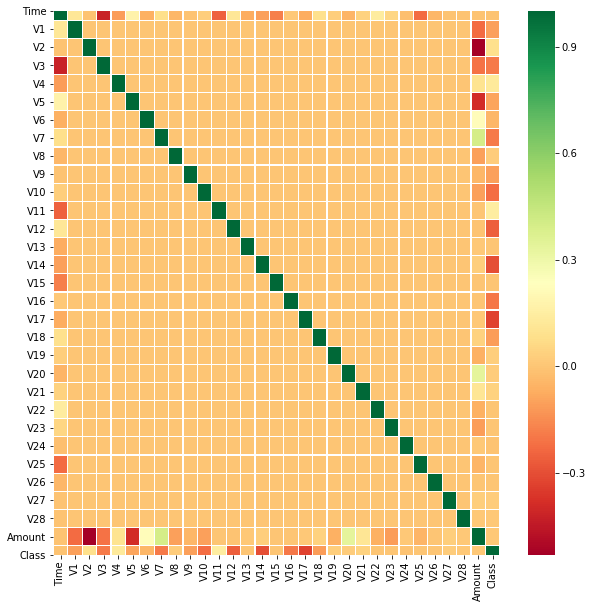

In [17]:
import seaborn as sns
plt.subplots(figsize=(10, 10))
sns.heatmap(corr_,annot=False,cmap='RdYlGn',linewidths=0.2)

**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать модель деревья решений. Сделать classification report.**

Модель Random Forest

In [18]:
feature_data = dataset.iloc[:,:30]
feature_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
input_x = feature_data
output_y = dataset.iloc[:,30:]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
targets=(output_y['Class']==1)
print(targets.value_counts())
Y=le.fit_transform(targets)
print(Y)
print(targets)

False    284315
True        492
Name: Class, dtype: int64
[0 0 0 ... 0 0 0]
0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Name: Class, Length: 284807, dtype: bool


In [20]:
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, Y, test_size=0.3)
model=RandomForestClassifier(n_estimators=100)
# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Как делать classification report:

In [21]:
from sklearn.metrics import classification_report
model_pred = model.predict(X_test_22)
print(classification_report(y_test_22, model_pred))
model.score(X_test_22, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85298
           1       0.93      0.79      0.86       145

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



0.9995552590615966

**8. Нормализовать данные и написать модель Random Forest уже на нормализованных данных. Сделать classification report. Сравнить с результатом, полученном в задаче 7. Нужно ли нормализовывать данные?**

In [22]:
headers = list(feature_data.columns.values)
print(headers)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [23]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(feature_data)
feature_norm = pd.DataFrame(np_scaled)
feature_norm.columns = headers
feature_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.165884,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.159060,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.171710,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.156100,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.169231,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551


In [24]:
input_x_norm = feature_norm
X_train_22_norm, X_test_22_norm, y_train_22, y_test_22 = train_test_split(input_x_norm, Y, test_size=0.3)
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train_22_norm,y_train_22)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
model_pred_norm = model.predict(X_test_22_norm)
print(classification_report(y_test_22, model_pred_norm))
model.score(X_test_22_norm, y_test_22)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85305
           1       0.97      0.80      0.88       138

    accuracy                           1.00     85443
   macro avg       0.99      0.90      0.94     85443
weighted avg       1.00      1.00      1.00     85443



0.9996488887328394

Значения метрик классификации высокие как в ненармализованных, так и в нормализованных данных из датасета. В данном случае нет надобности нормализовывать данныe из датасета

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные).**

In [27]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros.fit(X_train_22, y_train_22)
X_resampled, y_resampled = ros.fit_sample(X_train_22, y_train_22)
print('Количество элементов до операции:', len(X_train_22))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 199364
Количество элементов после операции: 398020
